Import Library

In [1]:
import numpy as np
import os
from PIL import Image
from PIL.ImageOps import autocontrast
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import load_img, array_to_img 
from keras.models import Model
from keras.layers import Conv2D, SeparableConv2D
from keras.layers import BatchNormalization, Activation
from keras.layers import Input, MaxPooling2D, Add
from keras.layers import Conv2DTranspose, UpSampling2D

In [2]:
# Hyper Parameters
EPOCH = 50        # Epoch
BATCH_SIZE = 32   # Batch Size
RES = 160         # Resolution

DATA_MODE = 1     # Data Processing Mode 
TRAIN_MODE =1     # CNN Train Mode

PATH = '/content/drive/MyDrive/IDEC/pet-1990'      # Output Path

Data Processing

In [3]:
input_dir = os.path.join(PATH,'images')
print(input_dir)

img_path = sorted([
                   os.path.join(input_dir, fname)
                   for fname in os.listdir(input_dir)
])

img_tot = len(img_path)
print("Input Image :",len(img_path))
print("Sample Path :",img_path[0])

/content/drive/MyDrive/IDEC/pet-1990/images
Input Image : 1190
Sample Path : /content/drive/MyDrive/IDEC/pet-1990/images/Ragdoll_1.jpg


In [4]:
target_dir = os.path.join(PATH,'trimaps')
print(target_dir)

target_path = sorted([
                   os.path.join(target_dir, fname)
                   for fname in os.listdir(target_dir)
])

print("Output Image :", len(target_path))
print("Sample Path :",target_path[0])

/content/drive/MyDrive/IDEC/pet-1990/trimaps
Output Image : 1190
Sample Path : /content/drive/MyDrive/IDEC/pet-1990/trimaps/Ragdoll_1.png


Output Image Show

[1 2 3]
[  0 127 255]


(-0.5, 290.5, 499.5, -0.5)

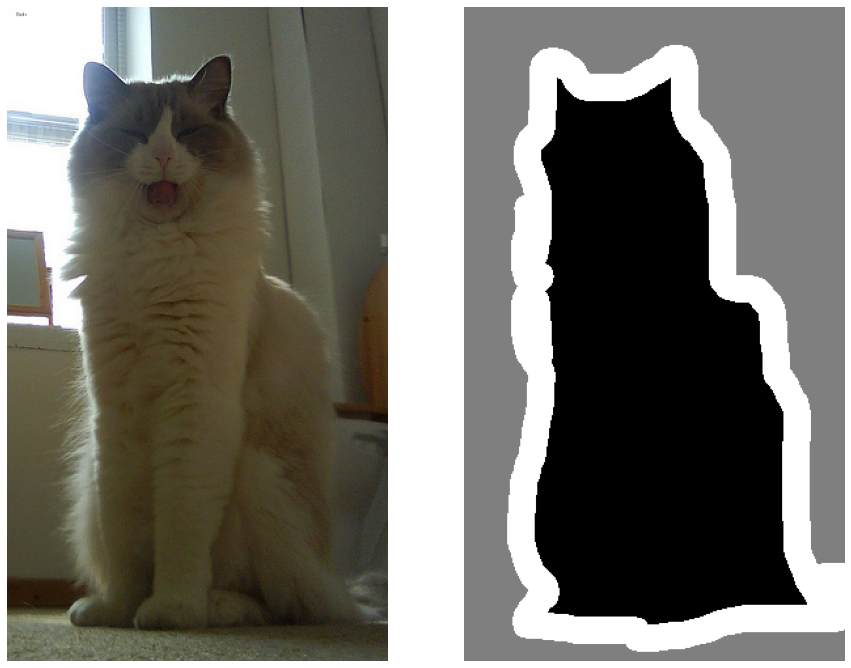

In [5]:
which = 28
img = load_img(target_path[which])

# Conver PIL Image to Numpy Matrix
#np.set_printoptions(threshold=np.inf)
#print(np.asarray(img))
print(np.unique(np.asarray(img)))

img = autocontrast(img)
print(np.unique(np.asarray(img)))

# Sample Image
fig, spot = plt.subplots(1,2,figsize=(15,20))
spot[0].imshow(Image.open(img_path[which]))
spot[0].axis('off')

#spot[1].imshow(Image.open(target_path[which]))
spot[1].imshow(autocontrast(load_img(target_path[which])))
spot[1].axis('off')

## 0   : Object
## 127 : Background
## 255 : Edge

In [6]:
#  Input Image Scaling
if DATA_MODE:
    print("Start Input Data Scaling")
    begin = time()

    X_data = np.zeros((img_tot, RES, RES, 3))
    for j, path in enumerate(img_path):
        # Set Image Size 160 x 160
        img = load_img(path, target_size=(RES, RES))
        X_data[j] = img

    end = time()

print("Input Data Scaling Time : {:.2f} sec".format(end-begin))
print("Input Data Shape :", X_data.shape)

Start Input Data Scaling
Input Data Scaling Time : 5.91 sec
Input Data Shape : (1190, 160, 160, 3)


In [7]:
# Output Image Scaling
if DATA_MODE:
    print("Start Output Data Scaling")
    begin = time()

    Y_data = np.zeros((img_tot, RES, RES, 1))
    for j, path in enumerate(target_path):
        map = load_img(path, target_size=(RES, RES), color_mode="grayscale")
        # Exapnd Channel 3-Dimension (160, 160) -> (160, 160, 1)
        Y_data[j] = np.expand_dims(map, axis=2)
        Y_data[j] -= 1  ## [1 2 3 ] -> [0 1 2 ]

    end = time()

print("Output Data Scaling Time : {:.2f} sec".format(end-begin))
print("Output Data Shape :", Y_data.shape)

Start Output Data Scaling
Output Data Scaling Time : 1.91 sec
Output Data Shape : (1190, 160, 160, 1)


In [8]:
# Numpy Data
if DATA_MODE:
    with open('arrays.npy', 'wb') as f:
        np.save(f, X_data)
        np.save(f, Y_data)

    print("Make Numpy Data File (.npy)")
else:
    with open('arrays.npy', 'rb') as f:
        X_data = np.load(f)
        Y_data = np.load(f)

Make Numpy Data File (.npy)


In [9]:
# Make Dataset Train-Test
X_train, X_test, Y_train, Y_test = train_test_split(X_data,
                                                    Y_data,
                                                    test_size = 0.2)

print("Train Input Data :", X_train.shape)
print("Train Output Data :", Y_train.shape)
print("Test Input Data :", X_test.shape)
print("Test Output Data :", Y_test.shape)

Train Input Data : (952, 160, 160, 3)
Train Output Data : (952, 160, 160, 1)
Test Input Data : (238, 160, 160, 3)
Test Output Data : (238, 160, 160, 1)
